In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

### PCA with Underperformed Linear Autoencoder

In [0]:
encoder = keras.models.Sequential([keras.layers.Dense(2,input_shape = [3])])
decoder = keras.models.Sequential([keras.layers.Dense(3,input_shape = [2])])

In [0]:
autoencoder = keras.models.Sequential([encoder,decoder])

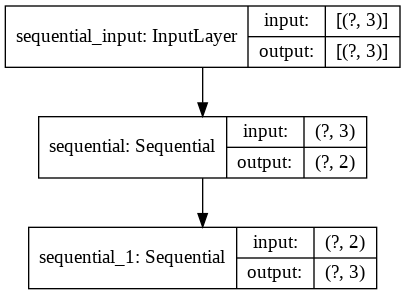

In [6]:
keras.utils.plot_model(autoencoder, show_shapes=True)

In [0]:
autoencoder.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=1.5))

#### Generate 3D Data

In [0]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [9]:
history = autoencoder.fit(X_train, X_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3493
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0834
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0828
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0774
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0450
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 13/100
2/2 [==============================] - 0s 2ms/st

In [0]:
codings = encoder.predict(X_train)

In [11]:
codings

array([[ 0.05686098,  1.4575975 ],
       [-0.23126525, -0.21697496],
       [ 0.02930866,  1.3459842 ],
       [-0.55556875,  0.8696565 ],
       [-0.45988557,  0.7230696 ],
       [ 0.67140007, -1.1599625 ],
       [ 0.0842853 ,  1.4962273 ],
       [ 0.92972183, -0.3333177 ],
       [ 0.40626422, -1.2032398 ],
       [ 0.03142342, -0.8200504 ],
       [-0.40278706,  1.0786488 ],
       [ 0.7917314 , -1.10443   ],
       [-0.17920464,  1.2518666 ],
       [ 0.02597412,  1.3420095 ],
       [ 0.847717  , -1.0141008 ],
       [-0.36078697,  0.1809848 ],
       [ 0.9578305 , -0.34066102],
       [ 0.09887056, -0.9631449 ],
       [ 0.9929554 , -0.58416   ],
       [ 0.0111618 ,  1.481427  ],
       [-0.02660929, -0.8163802 ],
       [ 0.22305354,  1.4663482 ],
       [-0.36859694,  1.0743489 ],
       [-0.21297476,  1.3894114 ],
       [ 0.85678923, -1.1051033 ],
       [ 0.9987323 , -0.62969935],
       [-0.42042324,  0.05207812],
       [ 0.792961  , -1.05306   ],
       [-0.4847428 ,

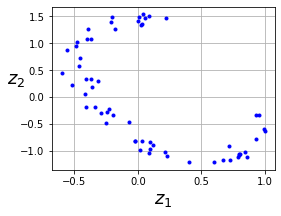

In [12]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# Stacked AutoEncoders

In [0]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])

In [0]:
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(784, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [0]:
stacked_ae = keras.models.Sequential([stacked_encoder,stacked_decoder])

#### Fashion MNIST

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [0]:
tf.random.set_seed(42)
np.random.seed(42)

In [0]:
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])

In [20]:
history = stacked_ae.fit(X_train, X_train, epochs=20)

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3379 - rounded_accuracy: 0.8864
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3071 - rounded_accuracy: 0.9137
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2997 - rounded_accuracy: 0.9203
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2958 - rounded_accuracy: 0.9239
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2931 - rounded_accuracy: 0.9262
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2913 - rounded_accuracy: 0.9279
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2900 - rounded_accuracy: 0.9289
Epoch 8/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2888 - rounded_accuracy: 0.9299
Epoch 9/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2880 - rounded_accuracy: 0.9307
Epoch 10/2

In [0]:
from sklearn.manifold import TSNE

In [0]:
X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)

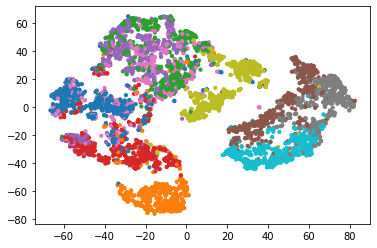

In [23]:
plt.scatter(X_valid_2D[:,0],X_valid_2D[:,1],c=y_valid,s=10,cmap='tab10')

### Tying Weights

In [0]:
class DenseTraspose(keras.layers.Layer):
  def __init__(self,dense,activation=None,**kwargs):
    self.dense = dense
    self.activation = keras.activations.get(activation)
    super().__init__(**kwargs)
  
  def build(self,batch_input_shape):
    self.biases = self.add_weight(name='bias',initializer='zeros',shape=[self.dense.input_shape[-1]])
    super().build(batch_input_shape)
  
  def call(self,inputs):
    z = tf.matmul(inputs, self.dense.weights[0],transpose_b=True)
    return self.activation(z+self.biases)

In [0]:
dense_1 = keras.layers.Dense(100,activation='selu')
dense_2 = keras.layers.Dense(30,activation='selu')

In [0]:
tied_enocder = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28,28]),
     dense_1,
     dense_2
    ]
)

In [0]:
tied_decoder = keras.models.Sequential(
    [
     DenseTraspose(dense_2,activation='selu'),
     DenseTraspose(dense_1,activation='sigmoid'),
     keras.layers.Reshape([28,28])
    ]
)

In [0]:
tied_ae = keras.models.Sequential([tied_enocder,tied_decoder])

In [0]:
tied_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])

In [30]:
history = tied_ae.fit(X_train, X_train, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3269 - rounded_accuracy: 0.8960
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2975 - rounded_accuracy: 0.9224
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2920 - rounded_accuracy: 0.9274
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2889 - rounded_accuracy: 0.9302
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2865 - rounded_accuracy: 0.9325
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2850 - rounded_accuracy: 0.9340
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2838 - rounded_accuracy: 0.9350
Epoch 8/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2830 - rounded_accuracy: 0.9358
Epoch 9/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2823 - rounded_accuracy: 0.9364
Epoch 10/1

# Covolutional Autoencoders

In [0]:
conv_encoder = keras.models.Sequential(
    [
     keras.layers.Reshape([28,28,1],input_shape=[28,28]),
     keras.layers.Conv2D(16,kernel_size=3,padding='same',activation='selu'),
     keras.layers.MaxPool2D(pool_size=2),
     keras.layers.Conv2D(32,kernel_size=3,padding='same',activation='selu'),
     keras.layers.MaxPool2D(pool_size=2),
     keras.layers.Conv2D(64,kernel_size=3,padding='same',activation='selu'),
     keras.layers.MaxPool2D(pool_size=2)
    ]
)

In [0]:
conv_decoder = keras.models.Sequential(
    [
     keras.layers.Conv2DTranspose(32,kernel_size=3,strides=2,padding='valid',activation='selu',input_shape=[3,3,64]),
     keras.layers.Conv2DTranspose(16,kernel_size=3,strides=2,padding='same',activation='selu'),
     keras.layers.Conv2DTranspose(1,kernel_size=3,strides=2,padding='same',activation='sigmoid'),
     keras.layers.Reshape([28,28])
    ]
)

In [0]:
conv_ae = keras.models.Sequential([conv_encoder,conv_decoder])

In [0]:
conv_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])

In [35]:
history = conv_ae.fit(X_train, X_train, epochs=20)

Epoch 1/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3068 - rounded_accuracy: 0.9139
Epoch 2/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2749 - rounded_accuracy: 0.9412
Epoch 3/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2699 - rounded_accuracy: 0.9461
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2673 - rounded_accuracy: 0.9488
Epoch 5/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2655 - rounded_accuracy: 0.9508
Epoch 6/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2643 - rounded_accuracy: 0.9521
Epoch 7/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2633 - rounded_accuracy: 0.9532
Epoch 8/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2625 - rounded_accuracy: 0.9543
Epoch 9/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2618 - rounded_accuracy: 0.9550
E

# Recurrent Autoencoders

In [0]:
recurrent_encoder = keras.models.Sequential(
    [
     keras.layers.LSTM(100,return_sequences=True,input_shape=[None,28]),
     keras.layers.LSTM(30)
    ]
)

In [0]:
recurrent_decoder = keras.models.Sequential(
    [
     keras.layers.RepeatVector(28,input_shape=[30]),
     keras.layers.LSTM(100,return_sequences=True),
     keras.layers.TimeDistributed(keras.layers.Dense(28,activation='sigmoid'))
    ]
)

In [0]:
recurrent_ae = keras.models.Sequential(
    [
     recurrent_encoder,
     recurrent_decoder
    ]
)

In [0]:
recurrent_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(0.1),
                     metrics=[rounded_accuracy])

In [40]:
history = recurrent_ae.fit(X_train, X_train, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 43s 25ms/step - loss: 0.5093 - rounded_accuracy: 0.7563
Epoch 2/10
1719/1719 [==============================] - 43s 25ms/step - loss: 0.4014 - rounded_accuracy: 0.8423
Epoch 3/10
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3653 - rounded_accuracy: 0.8702
Epoch 4/10
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3530 - rounded_accuracy: 0.8801
Epoch 5/10
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3443 - rounded_accuracy: 0.8863
Epoch 6/10
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3378 - rounded_accuracy: 0.8905
Epoch 7/10
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3320 - rounded_accuracy: 0.8938
Epoch 8/10
1719/1719 [==============================] - 44s 25ms/step - loss: 0.3271 - rounded_accuracy: 0.8970
Epoch 9/10
1719/1719 [==============================] - 44s 25ms/step - loss: 0.3231 - rounded_accuracy:

# Denoising Autoencoders

In [0]:
dropuout_encoder = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dropout(0.5),
     keras.layers.Dense(100,activation='selu'),
     keras.layers.Dense(30,activation='selu')
    ]
)

In [0]:
dropout_decoder = keras.models.Sequential(
    [
     keras.layers.Dense(100,activation='selu',input_shape=[30]),
     keras.layers.Dense(28 * 28, activation='sigmoid'),
     keras.layers.Reshape([28,28])
    ]
)

In [0]:
dropuout_ae = keras.models.Sequential(
    [
     dropuout_encoder,
     dropout_decoder
    ]
)

In [0]:
dropuout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                     metrics=[rounded_accuracy])

In [45]:
history = dropuout_ae.fit(X_train, X_train, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3542 - rounded_accuracy: 0.8731
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3173 - rounded_accuracy: 0.9039
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3114 - rounded_accuracy: 0.9085
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3080 - rounded_accuracy: 0.9112
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3056 - rounded_accuracy: 0.9131
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3039 - rounded_accuracy: 0.9146
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3024 - rounded_accuracy: 0.9159
Epoch 8/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3013 - rounded_accuracy: 0.9167
Epoch 9/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3003 - rounded_accuracy: 0.9176
Epoch 10/1

# Sparse AutoEncoders

In [0]:
sparse_l1_encoder = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dense(100,activation='selu'),
     keras.layers.Dense(300,activation='sigmoid'),
     keras.layers.ActivityRegularization(l1=1e-3)
    ]
)

In [0]:
sparse_l1_decoder = keras.models.Sequential(
    [
     keras.layers.Dense(100,activation='selu',input_shape=[300]),
     keras.layers.Dense(28 * 28, activation='sigmoid'),
     keras.layers.Reshape([28,28])
    ]
)

In [0]:
sparse_l1_ae = keras.models.Sequential(
    [
     sparse_l1_encoder,
     sparse_l1_decoder
    ]
)

In [0]:
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                     metrics=[rounded_accuracy])

In [50]:
history = sparse_l1_ae.fit(X_train, X_train, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4275 - rounded_accuracy: 0.8197
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3681 - rounded_accuracy: 0.8699
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3528 - rounded_accuracy: 0.8816
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3420 - rounded_accuracy: 0.8886
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3355 - rounded_accuracy: 0.8934
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3295 - rounded_accuracy: 0.8987
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3257 - rounded_accuracy: 0.9018
Epoch 8/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3230 - rounded_accuracy: 0.9040
Epoch 9/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3208 - rounded_accuracy: 0.9057
Epoch 10/1

##### With KL-Divergence Regularizer

In [0]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

In [0]:
class KLDivergenceRegularizer(keras.regularizers.Regularizer):
  def __init__(self, weight, target=0.1):
    self.weight = weight
    self.target = target
  
  def __call__(self,inputs):
    mean_activities = K.mean(inputs,axis=0)
    return self.weight*(kl_divergence(self.target,mean_activities)+kl_divergence(1.0-self.target,1.0-mean_activities))

In [0]:
kld_reg = KLDivergenceRegularizer(weight=0.05,target=0.1)

In [0]:
sparse_kl_encoder = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dense(100,activation='selu'),
     keras.layers.Dense(300,activation='sigmoid',activity_regularizer=kld_reg)
    ]
)

In [0]:
sparse_kl_decoder = keras.models.Sequential(
    [
     keras.layers.Dense(100,activation='selu',input_shape=[300]),
     keras.layers.Dense(28 * 28, activation='sigmoid'),
     keras.layers.Reshape([28,28])
    ]
)

In [0]:
sparse_kl_ae = keras.models.Sequential(
    [
     sparse_kl_encoder,
     sparse_kl_decoder
    ]
)

In [0]:
sparse_kl_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                     metrics=[rounded_accuracy])

In [58]:
history = sparse_l1_ae.fit(X_train, X_train, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3173 - rounded_accuracy: 0.9083
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3158 - rounded_accuracy: 0.9094
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3147 - rounded_accuracy: 0.9103
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3135 - rounded_accuracy: 0.9112
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3126 - rounded_accuracy: 0.9119
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3116 - rounded_accuracy: 0.9126
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3107 - rounded_accuracy: 0.9134
Epoch 8/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3099 - rounded_accuracy: 0.9141
Epoch 9/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3090 - rounded_accuracy: 0.9149
Epoch 10/1

# Variational Autoencoder

In [0]:
class Sampling(keras.layers.Layer):
  def call(self,inputs):
    mean, log_var = inputs
    return K.random_normal(tf.shape(log_var)) * K.exp(log_var/2) + mean

sampling = Sampling()

In [0]:
codings_size = 10

In [0]:
inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150,activation='selu')(z)
z = keras.layers.Dense(100,activation='selu')(z)
codings_mean = keras.layers.Dense(codings_size)(z) # mean
codings_log_var  = keras.layers.Dense(codings_size)(z)
codings = sampling([codings_mean,codings_log_var])
variational_encoder = keras.Model(inputs=[inputs],outputs=[codings_mean,codings_log_var,codings])

In [0]:
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100,activation='selu')(decoder_inputs)
x = keras.layers.Dense(150, activation='selu')(x)
x = keras.layers.Dense(28*28,activation='sigmoid')(x)
outputs = keras.layers.Reshape([28,28])(x)
variational_decoder = keras.Model(inputs=[decoder_inputs], outputs=[outputs])

In [0]:
_, _ , codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.Model(inputs=[inputs],outputs=[reconstructions])

In [0]:
latent_loss = -0.5*K.sum(1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean), axis=-1)
variational_ae.add_loss(K.mean(latent_loss)/784.)
variational_ae.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [65]:
history = variational_ae.fit(X_train,X_train,epochs=50,batch_size=128)

Epoch 1/50
430/430 [==============================] - 3s 7ms/step - loss: 0.3878
Epoch 2/50
430/430 [==============================] - 3s 7ms/step - loss: 0.3425
Epoch 3/50
430/430 [==============================] - 3s 7ms/step - loss: 0.3325
Epoch 4/50
430/430 [==============================] - 3s 7ms/step - loss: 0.3272
Epoch 5/50
430/430 [==============================] - 3s 7ms/step - loss: 0.3240
Epoch 6/50
430/430 [==============================] - 3s 7ms/step - loss: 0.3218
Epoch 7/50
430/430 [==============================] - 3s 7ms/step - loss: 0.3203
Epoch 8/50
430/430 [==============================] - 3s 7ms/step - loss: 0.3190
Epoch 9/50
430/430 [==============================] - 3s 7ms/step - loss: 0.3180
Epoch 10/50
430/430 [==============================] - 3s 7ms/step - loss: 0.3172
Epoch 11/50
430/430 [==============================] - 3s 7ms/step - loss: 0.3164
Epoch 12/50
430/430 [==============================] - 3s 7ms/step - loss: 0.3159
Epoch 13/50
430/430 [====

In [0]:
codings = tf.random.normal(shape=[12,codings_size])
images = variational_decoder(codings).numpy()

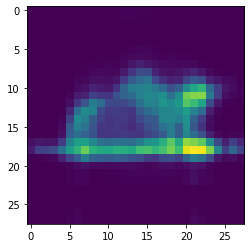

In [67]:
plt.imshow(images[3,:,:])